#### Churn Classification

this is a data set which contain several features , & we need to apply classification model , to be able to detect if the person exited or not

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [41]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
data.shape

(10000, 14)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [44]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Unique Values

ok we can notice that row number is just a series of number , so it'll not be helpful for training , so we'll drop it later

also we can notice a binary values (just ones & zeros) at HasCrCard , IsActiveMember , and ofcourse the output Exited

we need to look to the unique values of each feature , and this can be easily done here


In [45]:
for column in data.columns : 
    print('Number of unique data for {0} is {1}'.format(column , len(data[column].unique())))
    print('unique data for {0} is {1}'.format(column , data[column].unique()))
    print('=====================================')

Number of unique data for RowNumber is 10000
unique data for RowNumber is [    1     2     3 ...  9998  9999 10000]
Number of unique data for CustomerId is 10000
unique data for CustomerId is [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Number of unique data for Surname is 2932
unique data for Surname is ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Number of unique data for CreditScore is 460
unique data for CreditScore is [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 80

In [46]:
data.drop(['RowNumber', 'CustomerId', 'Surname' ], axis=1, inplace=True)

In [47]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

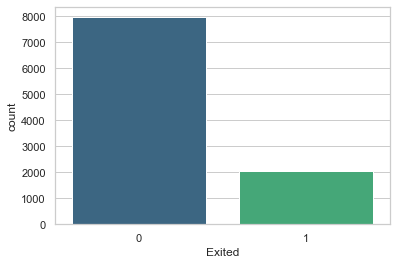

In [48]:
sns.countplot(x='Exited', data=data,palette='viridis') 

<AxesSubplot:xlabel='Geography', ylabel='count'>

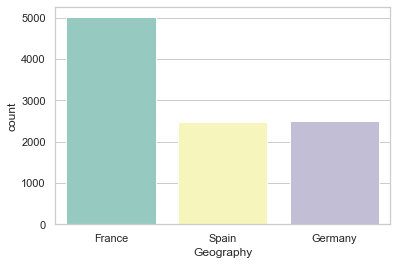

In [49]:
sns.countplot(x='Geography', data=data,palette="Set3") 

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

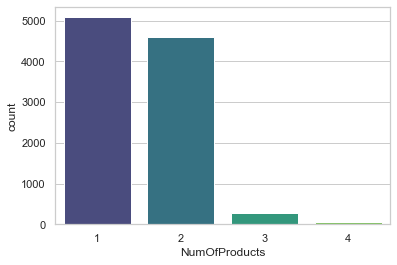

In [50]:
sns.countplot(x='NumOfProducts', data=data,palette='viridis') 

<AxesSubplot:xlabel='Gender', ylabel='count'>

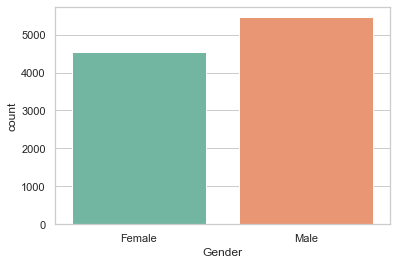

In [51]:
sns.countplot(x='Gender', data=data,palette = "Set2") 

<AxesSubplot:xlabel='Tenure', ylabel='count'>

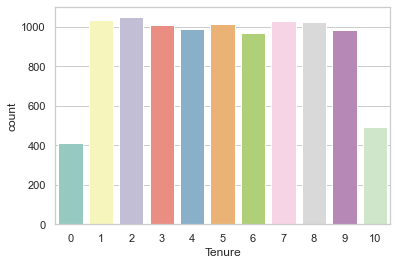

In [52]:
sns.countplot(x='Tenure', data=data,palette="Set3") 

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>]], dtype=object)

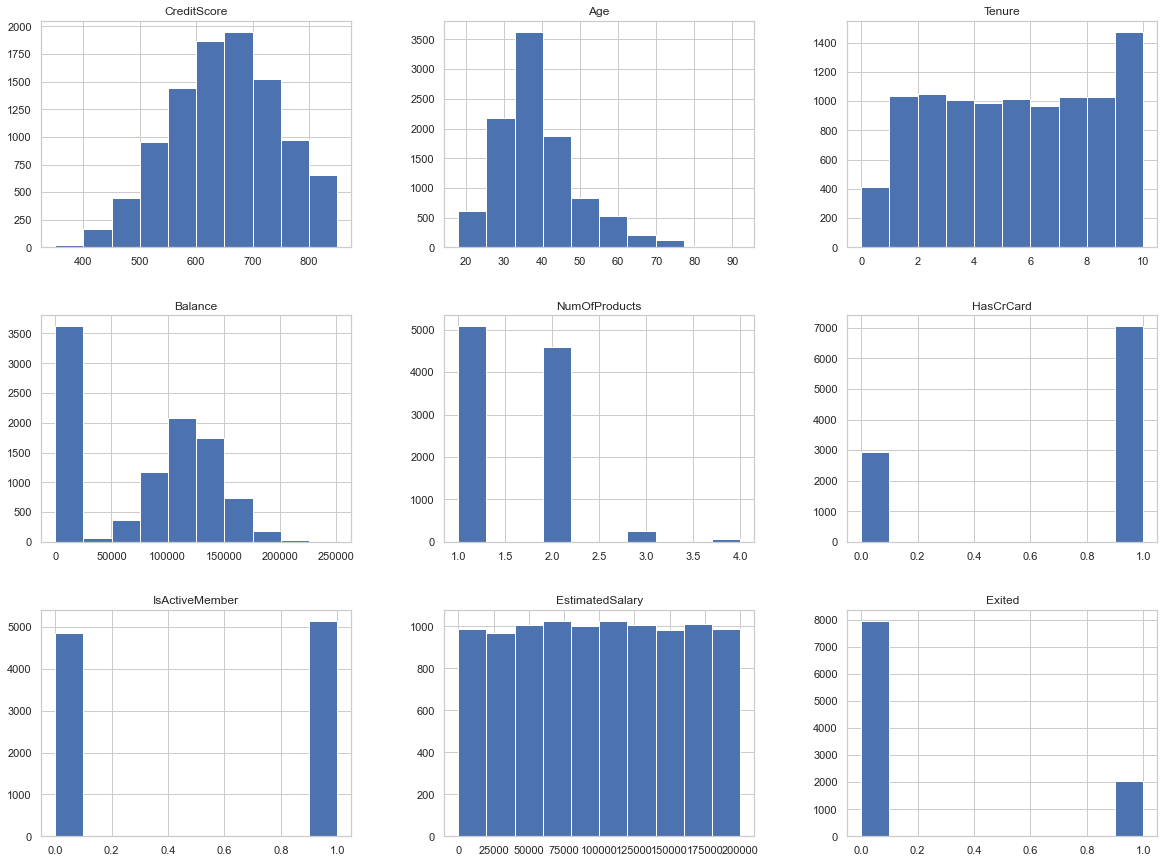

In [53]:
data.hist(figsize=(20,15))

<AxesSubplot:>

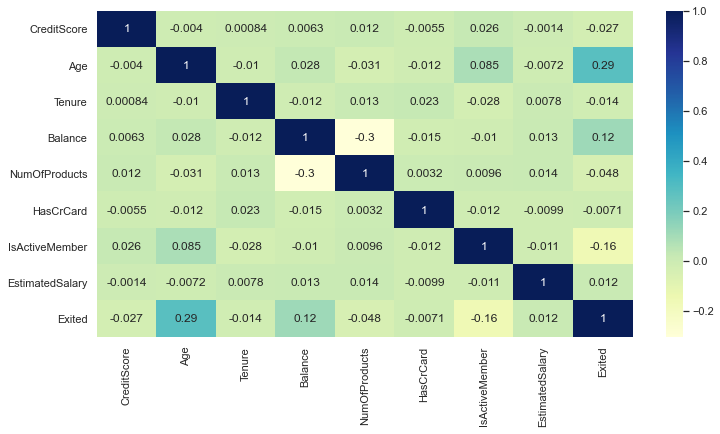

In [54]:
corr=data.corr()
plt.subplots(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

In [55]:
corr.sort_values(["Exited"], ascending = False, inplace = True)
print(corr.Exited)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [57]:
def make_label_encoder(original_feature , new_feature) : 
    enc  = LabelEncoder()
    enc.fit(data[original_feature])
    data[new_feature] = enc.transform(data[original_feature])
    data.drop([original_feature],axis=1, inplace=True)

In [58]:
make_label_encoder('Geography' , 'Geography Code')
make_label_encoder('Gender' , 'Gender Code')
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography Code,Gender Code
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [59]:
#Data Splitting
#now we are ready to define X , y data

X = data.drop(['Exited'], axis=1, inplace=False)
y = data['Exited']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (6700, 10)
X_test shape is  (3300, 10)
y_train shape is  (6700,)
y_test shape is  (3300,)


#### Data Standardization

In [61]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

#### Building the Model

In [62]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(X_train, y_train)

print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)

DecisionTreeClassifierModel Train Score is :  0.8405970149253731
DecisionTreeClassifierModel Test Score is :  0.8384848484848485
DecisionTreeClassifierModel Classes are :  [0 1]
DecisionTreeClassifierModel feature importances are :  [0.         0.52092049 0.         0.02097101 0.27868453 0.
 0.17942397 0.         0.         0.        ]


In [63]:
y_pred = DecisionTreeClassifierModel.predict(X_test)
print("Test Accurary : ",DecisionTreeClassifierModel.score(X_test,y_test))
print("Train Accurary : ",DecisionTreeClassifierModel.score(X_train,y_train))

Test Accurary :  0.8384848484848485
Train Accurary :  0.8405970149253731


In [64]:
from sklearn.metrics import confusion_matrix,classification_report
cm_lr = confusion_matrix(y_test,y_pred)
cr_lr = classification_report(y_test,y_pred)
print("confusion matrix : \n",cm_lr)
print("classification report : \n",cr_lr)

confusion matrix : 
 [[2603   23]
 [ 510  164]]
classification report : 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2626
           1       0.88      0.24      0.38       674

    accuracy                           0.84      3300
   macro avg       0.86      0.62      0.64      3300
weighted avg       0.84      0.84      0.80      3300

